In [1]:
from collections import defaultdict
from typing import List

import matplotlib.pyplot as plt
import random 

from dice import ScoreBasedPlayer,Game

In [2]:
num_players = 6
num_games = 10000
score_goal = 5000

In [3]:
## without function

In [4]:
wins = 0
player_avg_scores = []
possible_scores = [i for i in range(50,500,50)]

for i in range(num_games):
    player_of_interest = ScoreBasedPlayer(300)  ## magic number
    players = [ScoreBasedPlayer(random.choice(possible_scores)) for _ in range(num_players-1)] 
    player_avg_scores.append(sum([player.min_score for player in players])/len(players))
    players.append(player_of_interest)
    random.shuffle(players)
    game = Game(players,score_goal)
    game.play()
    
    if game.winner == player_of_interest:
        wins += 1
        
        
wins = wins / num_games
print(wins)
print(sum(player_avg_scores)/len(player_avg_scores))

0.2458
249.756


In [5]:
def score_based_simulation(player_of_interest_score:int,num_players:int=6,num_games:int=10000,score_goal:int=5000,max_player_scores:int=500,score_step:int=50)->float:
    wins = 0
    player_avg_scores = []
    possible_scores = [i for i in range(50,max_player_scores,score_step)]

    for i in range(num_games):
        player_of_interest = ScoreBasedPlayer(player_of_interest_score)  
        players = [ScoreBasedPlayer(random.choice(possible_scores)) for _ in range(num_players-1)] 
        player_avg_scores.append(sum([player.min_score for player in players])/len(players))
        players.append(player_of_interest)
        random.shuffle(players)
        game = Game(players,score_goal)
        game.play()

        if game.winner == player_of_interest:
            wins += 1


    return wins / num_games,sum(player_avg_scores)/len(player_avg_scores)

In [6]:
score_based_simulation(300)

(0.2464, 249.638)

In [7]:
def turn_based_simulations(scores_to_be_examined:List[int],num_players:int=6,num_games:int=10000,score_goal:int=5000,max_player_scores:int=500,score_step:int=50):
    wins = defaultdict(int)
    
    for score in scores_to_be_examined:
        wins[score] = score_based_simulation(score,num_players=num_players,num_games=num_games,score_goal=score_goal,max_player_scores=max_player_scores,score_step=score_step)
        
    
    return wins
    

In [8]:
wins = turn_based_simulations([score for score in range(50,1000,50)],num_games=100,max_player_scores=300)
wins

defaultdict(int,
            {50: (0.0, 146.6),
             100: (0.03, 146.6),
             150: (0.15, 154.5),
             200: (0.35, 153.4),
             250: (0.33, 150.6),
             300: (0.37, 153.0),
             350: (0.38, 151.0),
             400: (0.37, 143.6),
             450: (0.37, 153.1),
             500: (0.31, 149.0),
             550: (0.23, 148.5),
             600: (0.25, 149.8),
             650: (0.24, 151.2),
             700: (0.23, 149.6),
             750: (0.18, 149.1),
             800: (0.23, 146.9),
             850: (0.18, 145.8),
             900: (0.12, 149.9),
             950: (0.07, 158.7)})

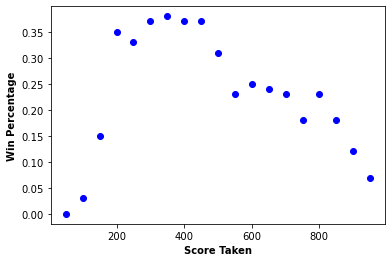

In [9]:
plt.scatter(x=wins.keys(),y=[value[0] for value in wins.values()],color='blue')
plt.xlabel('Score Taken',fontweight='bold')
plt.ylabel('Win Percentage',fontweight='bold')
plt.show()

In [10]:
import csv 
with open('scorebasedresults.csv',mode='w',newline='') as file:
    wr = csv.writer(file,delimiter = ',')
    wr.writerow(['Score','WinPercentage'])
    for key, value in wins.items():
        wr.writerow([key,value[0]])